<a href="https://colab.research.google.com/github/Francisco2963/Machine-Learning/blob/main/Regresi%C3%B3n_b%C3%A1sica_Ejercicio_de_Regresi%C3%B3n_1_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Regresión 1 (Core)

Objetivo

 Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

Descripción del problema:

Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

Instrucciones:

Carga de datos:

Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:

SqFt: Tamaño de la casa en pies cuadrados.

Bedrooms: Número de habitaciones.

Bathrooms: Número de baños.
price: Precio de venta de la casa.

Exploración de datos: Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.

Preparación de datos: Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

Entrenamiento del modelo: Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.

Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.

Predicción: Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:

Tamaño: 2000 pies cuadrados

Habitaciones: 3

Baños: 2

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [42]:
df = pd.read_csv('/content/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [44]:
df.duplicated().sum()

0

In [45]:
df['Brick'].unique()  # nominal

array(['No', 'Yes'], dtype=object)

In [46]:
df['Neighborhood'].unique() # nominal

array(['East', 'North', 'West'], dtype=object)

In [47]:
df_num=df[['Home','Price','SqFt','Bedrooms','Bathrooms','Offers']]
df_nom=df[['Brick','Neighborhood']]

In [48]:
df_nom

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East
...,...,...
123,Yes,East
124,Yes,East
125,No,North
126,No,West


In [49]:
# codificacion nominal
ohe=OneHotEncoder()
ohe.fit(df_nom)
df_nom=ohe.transform(df_nom)
df_nom=pd.DataFrame(df_nom.toarray(),columns=ohe.get_feature_names_out())
df_nom.head()

,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0


In [50]:
df_num.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [51]:
df_num.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [52]:
escalador=StandardScaler()
escalador.fit(df_num)
col=df_num.columns
df_num=escalador.transform(df_num)
df_num=pd.DataFrame(df_num, columns=col)
df_num.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,-1.718572,-0.602585,-1.000916,-1.415327,-0.868939,-0.542769
1,-1.691507,-0.606321,0.137904,1.350503,-0.868939,0.396075
2,-1.664443,-0.583903,-1.238171,-0.032412,-0.868939,-1.481614
3,-1.637379,-1.334923,-0.099350,-0.032412,-0.868939,0.396075
4,-1.610315,-0.397082,0.612413,-0.032412,1.082362,0.396075


In [53]:
df_num.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02
mean,-2.428613e-17,-6.938894e-18,-6.938894e-18,3.816392e-17,4.857226e-17,1.387779e-17
std,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00,1.003929e+00
min,-1.718572e+00,-2.291445e+00,-2.614246e+00,-1.415327e+00,-8.689388e-01,-1.481614e+00
25%,-8.592858e-01,-7.137432e-01,-5.738588e-01,-3.241208e-02,-8.689388e-01,-5.427694e-01
50%,0.000000e+00,-1.672922e-01,-4.448518e-03,-3.241208e-02,-8.689388e-01,3.960750e-01
75%,8.592858e-01,6.659287e-01,6.598635e-01,-3.241208e-02,1.082362e+00,3.960750e-01
max,1.718572e+00,3.018003e+00,2.795152e+00,2.733419e+00,3.033663e+00,3.212608e+00


In [54]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [55]:
df_final=pd.concat([df_num,df_nom],axis=1)
df_final.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,-1.718572,-0.602585,-1.000916,-1.415327,-0.868939,-0.542769,1.0,0.0,1.0,0.0,0.0
1,-1.691507,-0.606321,0.137904,1.350503,-0.868939,0.396075,1.0,0.0,1.0,0.0,0.0
2,-1.664443,-0.583903,-1.238171,-0.032412,-0.868939,-1.481614,1.0,0.0,1.0,0.0,0.0
3,-1.637379,-1.334923,-0.099350,-0.032412,-0.868939,0.396075,1.0,0.0,1.0,0.0,0.0
4,-1.610315,-0.397082,0.612413,-0.032412,1.082362,0.396075,1.0,0.0,1.0,0.0,0.0


In [56]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Home                128 non-null    float64
 1   Price               128 non-null    float64
 2   SqFt                128 non-null    float64
 3   Bedrooms            128 non-null    float64
 4   Bathrooms           128 non-null    float64
 5   Offers              128 non-null    float64
 6   Brick_No            128 non-null    float64
 7   Brick_Yes           128 non-null    float64
 8   Neighborhood_East   128 non-null    float64
 9   Neighborhood_North  128 non-null    float64
 10  Neighborhood_West   128 non-null    float64
dtypes: float64(11)
memory usage: 11.1 KB


In [57]:
# Separar variables predictoras y objetivo
X = df_final[['Home','SqFt','Bedrooms','Bathrooms','Offers','Brick_No','Brick_Yes','Neighborhood_East','Neighborhood_North','Neighborhood_West']]
y = df_final['Price']

In [58]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [62]:
# Realizar predicciones
y_pred = modelo.predict(X_test)

In [63]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'R-cuadrado: {r2}')

Error Cuadrático Medio (MSE): 0.11185829330552381
R-cuadrado: 0.8762841799406083


COMENTARIO:

Error Cuadrático Medio (MSE): 0.11185829330552381:

Este valor indica que, en promedio, las predicciones del modelo se desvían del valor real en aproximadamente 0.111 unidades (la unidad dependerá de cómo estén escalados los datos). Un valor menor indica un mejor ajuste del modelo.


R-cuadrado: 0.8762841799406083:

Este valor indica que el modelo explica aproximadamente el 87.62% de la variabilidad del precio de las casas. Es decir, las características utilizadas en el modelo son capaces de explicar una gran parte de las variaciones en el precio.

# Visualizacion del Resultado

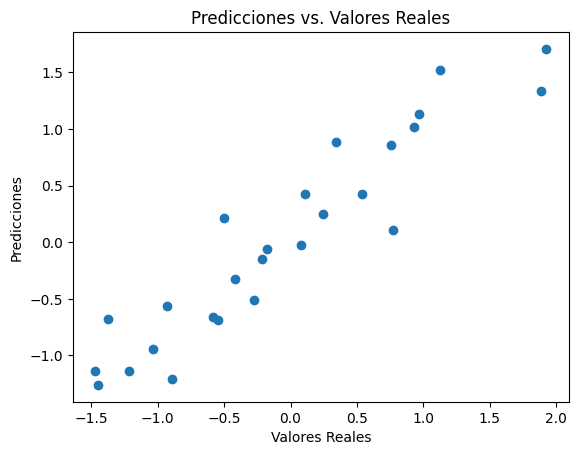

In [64]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

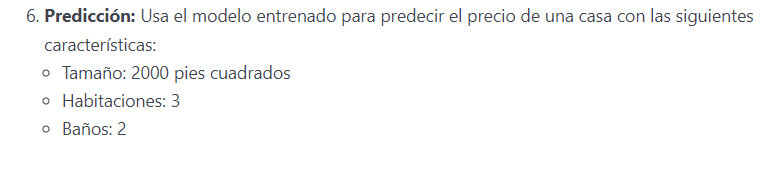

In [70]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

#'X_train' es el DataFrame utilizado para entrenar el modelo
# Obtener los nombres de las funciones de los datos de entrenamiento.
nombre_caracteristicas = X_train.columns

# Crea un nuevo DataFrame con todas las características necesarias, inicializado a 0
La_casa = pd.DataFrame(0, index=[0], columns=nombre_caracteristicas)

# Establecer los valores para las características conocidas.
La_casa['SqFt'] = 2000
La_casa['Bedrooms'] = 3
La_casa['Bathrooms'] = 2
#... agregar otras características conocidas con sus respectivos valores

# Manejar valores faltantes usando imputación
imputer = SimpleImputer(strategy='mean')  # Reemplazar NaN con la media de cada columna
La_casa_imputed = pd.DataFrame(imputer.fit_transform(La_casa), columns=La_casa.columns)

# Realizar la predicción utilizando los datos imputados
prediccion = modelo.predict(La_casa_imputed)

# Imprimir la predicción
print("El precio predicho de la casa es:", prediccion)

El precio predicho de la casa es: [818.49800001]
